# Experiment Report

In [2]:
import os
import numpy as np
np.warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

import seaborn as sns
import json
%matplotlib inline

# statistics
from scipy import stats
from itertools import product, combinations

In [4]:
results = {}
root = "/Users/lucasosouza/Documents/dissertacao/"
root_results = "results/"
results_paths = ["masters-marlo/"]
for results_path in results_paths:
    experiments = [f for f in os.listdir(root+root_results+results_path) if f[-4:] == 'json']
    for exp in experiments:
        exp_name = exp[:-5]
        with open( root+root_results+results_path+exp, 'r') as f:
            data = json.load(f)
            if exp_name in results:
                for metric, values in data.items():
                    results[exp_name][metric].extend(values)
            else:
                results[exp_name] = data                

In [5]:
experiments

['dqn_sharing.json',
 'dqn_prio_sharing.json',
 'dqn_prio_focus_sharing.json',
 'dqn_focus_sharing.json',
 'dqn.json',
 'dqn_prio.json']

In [6]:
episode_count = {}
for exp in experiments:
    exp_name = exp[:-5]
    episode_count[exp_name] = results[exp_name]['episodes_to_complete']

In [7]:
for key, data in episode_count.items():
    print("{}: {}".format(key, sorted(data).count(1000)))

dqn_sharing: 0
dqn_prio_sharing: 0
dqn_prio_focus_sharing: 0
dqn_focus_sharing: 0
dqn: 0
dqn_prio: 0


In [8]:
episode_count

{'dqn_sharing': [100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  100,
  13,
  100,
  100,
  100,
  100,
  100,
  73,
  100,
  100,
  100],
 'dqn_prio_sharing': [43,
  6,
  17,
  12,
  33,
  31,
  15,
  22,
  31,
  26,
  44,
  28,
  24,
  34,
  42,
  34,
  17,
  25,
  11,
  8],
 'dqn_prio_focus_sharing': [6,
  6,
  8,
  6,
  7,
  6,
  6,
  5,
  6,
  6,
  6,
  6,
  7,
  6,
  6,
  6,
  6,
  8,
  6,
  6],
 'dqn_focus_sharing': [16,
  31,
  58,
  45,
  35,
  30,
  100,
  100,
  40,
  53,
  100,
  21,
  100,
  35,
  100,
  61,
  100,
  100,
  100,
  100],
 'dqn': [100,
  84,
  39,
  33,
  46,
  42,
  42,
  74,
  65,
  70,
  100,
  88,
  96,
  96,
  100,
  100,
  100,
  100,
  100,
  100],
 'dqn_prio': [6,
  21,
  20,
  12,
  7,
  6,
  17,
  6,
  7,
  9,
  12,
  6,
  16,
  6,
  7,
  6,
  11,
  6,
  24,
  6]}

In [9]:
print("means")
for k,v in episode_count.items():
    print(np.mean(v))

print("\ndeviations")
for k,v in episode_count.items():
    print(np.std(v))


means
94.3
25.15
6.25
66.25
78.75
10.55

deviations
19.555306185278717
11.257330944766615
0.698212002188447
32.20694800815501
24.551731099863407
5.748695504199191


In [10]:
steps_count = {}
for exp in experiments:
    exp_name = exp[:-5]
    steps_count[exp_name] = results[exp_name]['average_steps']

In [11]:
## NUM STEPS
print("means")
for k,v in steps_count.items():
    print(np.mean(v))

print("\ndeviations")
for k,v in steps_count.items():
    print(np.std(v))

    

means
135.29163329820867
28.579722263956864
22.294642857142854
37.560993559000124
36.6958818323764
25.913693977591038

deviations
106.47402097177226
5.580691831583672
7.320635482596276
16.847005380218473
16.48265134054216
4.221864120846951


In [12]:
rewards_count = {}
for exp in experiments:
    exp_name = exp[:-5]
    rewards_count[exp_name] = results[exp_name]['average_rewards']

In [13]:
## NUM STEPS
print("means")
for k,v in rewards_count.items():
    print(np.mean(v))

print("\ndeviations")
for k,v in rewards_count.items():
    print(np.std(v))

    

means
-1.0434192246534857
0.17553810374069723
0.24745773785648742
0.08033857299038108
0.09489438697540749
0.2065866750702358

deviations
1.228331597771231
0.06687722528962112
0.08719767178689804
0.19885103481502703
0.19363029042631102
0.046911804867060744


In [14]:
experiments

['dqn_sharing.json',
 'dqn_prio_sharing.json',
 'dqn_prio_focus_sharing.json',
 'dqn_focus_sharing.json',
 'dqn.json',
 'dqn_prio.json']

In [15]:
results.keys()

dict_keys(['dqn_sharing', 'dqn_prio_sharing', 'dqn_prio_focus_sharing', 'dqn_focus_sharing', 'dqn', 'dqn_prio'])

In [16]:
experiments_labels = {
    'dqn_sharing': 'DQN + Naive ES',
    'dqn_prio_sharing': 'DQN-PR + Prioritized ES', 
    'dqn_prio_focus_sharing': 'DQN-PR + Prioritized Focused ES', 
    'dqn_focus_sharing': 'DQN + Focused ES', 
    'dqn': 'DQN',
    'dqn_prio': 'DQN-PR',
}

In [20]:
# format plots
import matplotlib
matplotlib.rc('xtick', labelsize=14)
matplotlib.rc('ytick', labelsize=14)
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({"axes.grid": True, "grid.linewidth": 0.75})


In [73]:
def plot_multi(results, combinations, colors):
    # https://matplotlib.org/examples/pylab_examples/subplots_demo.html
    
    f, axes = plt.subplots(len(combinations), 1, sharex=True, figsize=(10,10))
    f.subplots_adjust(hspace=0.1)

    for idx, comb in enumerate(combinations):
        for exp_id, color in zip(comb, colors):
            sns.distplot(results[exp_id], label=experiments_labels[exp_id], color=color, ax=axes[idx], kde=True, bins=np.arange(0,101,10))

            axes[idx].xaxis.grid(True)
            axes[idx].yaxis.grid(False)
            axes[idx].set_yticks(np.arange(0,0.11,0.02));    

            axes[idx].legend()

        axes[idx].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))            

    # plt.xlabel("Number of episodes to complete trial")
    f.text(0.5, 0.065, 'Number of episodes required to complete task', ha='center')
    f.text(0.02, 0.5, 'Frequency', va='center', rotation='vertical')
    plt.ylim((0,0.1));
    # plt.yticks(np.arange(0,0.11,0.02));    
    plt.xlim((0,100));

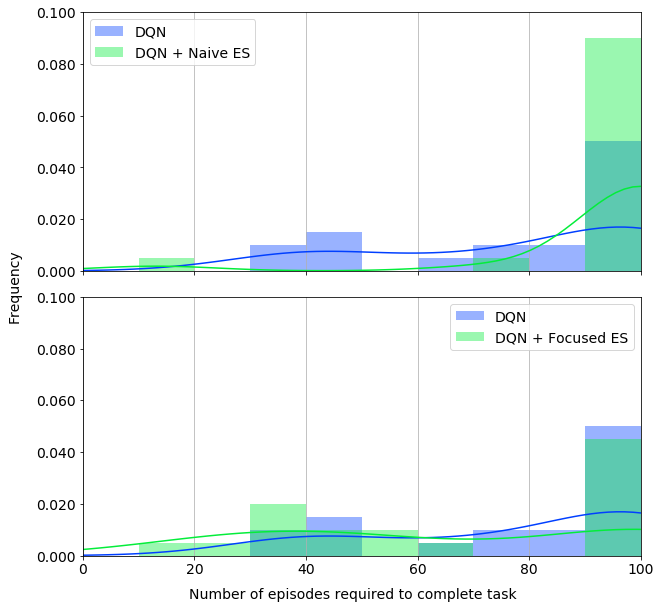

In [101]:
plot_multi(episode_count, (['dqn', 'dqn_sharing'], ['dqn', 'dqn_focus_sharing']), ['#003FFF', '#03ED3A'])
plt.savefig('singleVSmulti-Malmo.png', dpi=200, bbox_inches='tight')

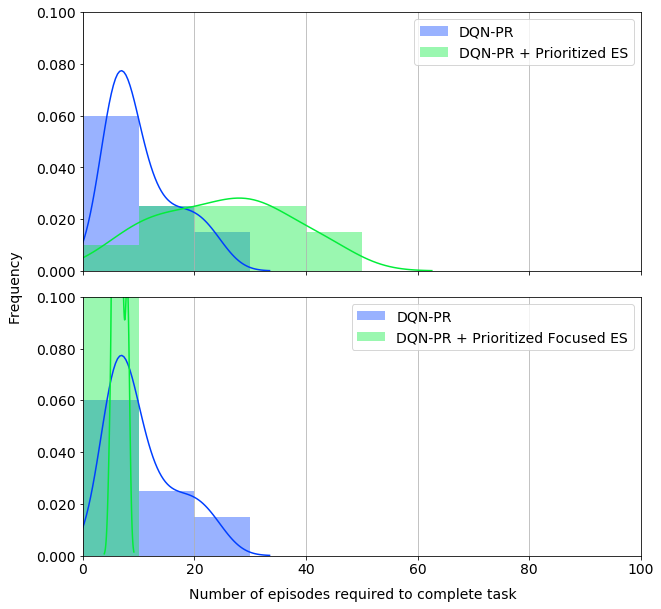

In [102]:
plot_multi(episode_count, (['dqn_prio', 'dqn_prio_sharing'], ['dqn_prio', 'dqn_prio_focus_sharing']), ['#003FFF', '#03ED3A'])
plt.savefig('singleVSmulti-prio-Malmo.png', dpi=200, bbox_inches='tight')

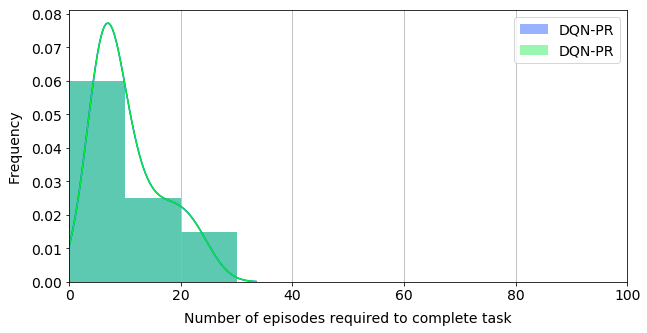

In [47]:
plot_single(episode_count, (['dqn_prio', 'dqn_prio']), ['#003FFF', '#03ED3A'])
plt.savefig('singleVSmulti-prio.png', dpi=200, bbox_inches='tight')

In [46]:
def plot_single(results, selected_experiments, colors):
    plt.figure(figsize=(10,5))
    # plt.xticks(np.arange(0,300000,50000))
    plt.grid(axis='y')
    for exp_id, color in zip(selected_experiments, colors):
        # exp_label = experiments[exp_name]
        sns.distplot(results[exp_id], label=experiments_labels[exp_id], color=color,  bins=np.arange(0,101,10))
        
    plt.legend()
    plt.xlabel("Number of episodes required to complete task", labelpad=9)
    plt.ylabel("Frequency", labelpad=10)
    plt.xlim((0,100))

    # plt.ylim(0, 0.06)
        


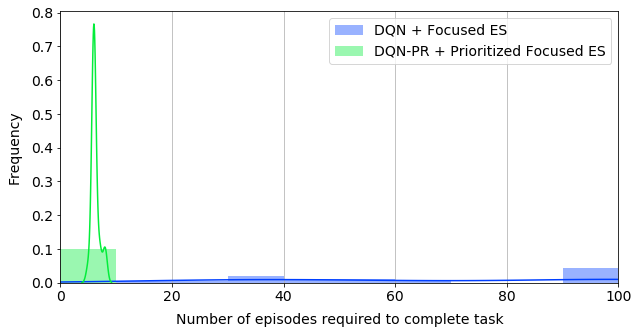

In [43]:
plot_single(episode_count, ['dqn_focus_sharing', 'dqn_prio_focus_sharing'], ['#003FFF', '#03ED3A'])
plt.savefig('multiComparison.png', dpi=200, bbox_inches='tight')

In [76]:
graph = {}

In [77]:
for k,v in episode_count.items():
    print(k, np.mean(v))


dqn_sharing 94.3
dqn_prio_sharing 25.15
dqn_prio_focus_sharing 6.25
dqn_focus_sharing 66.25
dqn 78.75
dqn_prio 10.55


In [78]:
graph['ETC Mean'] = []
for k,v in episode_count.items():
    graph['ETC Mean'].append(np.mean(v))

graph['ETC Deviation'] = []
for k,v in episode_count.items():
    graph['ETC Deviation'].append(np.std(v))

In [82]:
graph['Trials Failed'] = []
for k,v in episode_count.items():
    graph['Trials Failed'].append(sorted(v).count(100))
    

In [83]:
experiments_labels.values()

dict_values(['DQN + Naive ES', 'DQN-PR + Prioritized ES', 'DQN-PR + Prioritized Focused ES', 'DQN + Focused ES', 'DQN', 'DQN-PR'])

In [90]:
pd.set_option("display.colheader_justify","left")
df = pd.DataFrame.from_dict(graph)
df = df.transpose()
df.columns=[experiments_labels[e] for e in episode_count.keys()]
df = df.transpose()
df['ETC Mean'] = df['ETC Mean'].round(decimals=2)
df['ETC Deviation'] = df['ETC Deviation'].round(decimals=2)
df['Trials Failed'] = pd.to_numeric(df['Trials Failed'], downcast='integer')
df.style.set_properties(**{'text-align': 'center'})
# df = df.sort_values(by='ETC Mean')
df = df.sort_index()
df.head(10)

,ETC Mean,ETC Deviation,Trials Failed
DQN,78.75,24.55,8
DQN + Focused ES,66.25,32.21,9
DQN + Naive ES,94.30,19.56,18
DQN-PR,10.55,5.75,0
DQN-PR + Prioritized ES,25.15,11.26,0
DQN-PR + Prioritized Focused ES,6.25,0.70,0


In [91]:
# calculate improvements 
col = 'ETC Improvement' 
metric = 'ETC Mean'
df[col] = 0

base_key = 'DQN-PR'
for key in ['DQN-PR', 'DQN-PR + Prioritized Focused ES','DQN-PR + Prioritized ES']:
    df.loc[key, col] = (100*(df.loc[base_key, metric]-df.loc[key, metric])/df.loc[base_key, metric]).round(2)
    
base_key = 'DQN'
for key in ['DQN', 'DQN + Focused ES','DQN + Naive ES']:
    df.loc[key, col] = (100*(df.loc[base_key, metric]-df.loc[key, metric])/df.loc[base_key, metric]).round(2)
    


In [99]:
df.head(10)

,ETC Mean,ETC Deviation,Trials Failed,ETC Improvement
DQN,78.75,24.55,8,0.00
DQN + Focused ES,66.25,32.21,9,15.87
DQN + Naive ES,94.30,19.56,18,-19.75
DQN-PR,10.55,5.75,0,0.00
DQN-PR + Prioritized ES,25.15,11.26,0,-138.39
DQN-PR + Prioritized Focused ES,6.25,0.70,0,40.76


In [100]:
print(df.to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &  ETC Mean &  ETC Deviation &  Trials Failed &  ETC Improvement \\
\midrule
DQN                             &  78.75    &  24.55         &   8            &    0.00          \\
DQN + Focused ES                &  66.25    &  32.21         &   9            &   15.87          \\
DQN + Naive ES                  &  94.30    &  19.56         &  18            &  -19.75          \\
DQN-PR                          &  10.55    &   5.75         &   0            &    0.00          \\
DQN-PR + Prioritized ES         &  25.15    &  11.26         &   0            & -138.39          \\
DQN-PR + Prioritized Focused ES &   6.25    &   0.70         &   0            &   40.76          \\
\bottomrule
\end{tabular}



In [ ]:
# add number of episodes failed

In [103]:
def calc_stats(res):
    # get specific variable to compare
    all_values = list(res.items())
    samples = list(combinations(all_values, 2))
    for sample in samples:
        print(sample[0][0], "vs ",  sample[1][0])
        print("\n")
        print(stats.ks_2samp(sample[0][1], sample[1][1]))  
        print("\n")

calc_stats(episode_count)

dqn_sharing vs  dqn_prio_sharing


Ks_2sampResult(statistic=0.95, pvalue=4.740626972386828e-09)


dqn_sharing vs  dqn_prio_focus_sharing


Ks_2sampResult(statistic=1.0, pvalue=5.546615975073734e-10)


dqn_sharing vs  dqn_focus_sharing


Ks_2sampResult(statistic=0.5, pvalue=0.008161678659143069)


dqn_sharing vs  dqn


Ks_2sampResult(statistic=0.5, pvalue=0.008161678659143069)


dqn_sharing vs  dqn_prio


Ks_2sampResult(statistic=0.95, pvalue=4.740626972386828e-09)


dqn_prio_sharing vs  dqn_prio_focus_sharing


Ks_2sampResult(statistic=0.9, pvalue=3.629597429424607e-08)


dqn_prio_sharing vs  dqn_focus_sharing


Ks_2sampResult(statistic=0.65, pvalue=0.0001833144473939013)


dqn_prio_sharing vs  dqn


Ks_2sampResult(statistic=0.8, pvalue=1.5294975345128762e-06)


dqn_prio_sharing vs  dqn_prio


Ks_2sampResult(statistic=0.6, pvalue=0.0007252860301701252)


dqn_prio_focus_sharing vs  dqn_focus_sharing


Ks_2sampResult(statistic=1.0, pvalue=5.546615975073734e-10)


dqn_prio_focus_sharing v